# **CUDA Examples**

In [1]:
import os
os.environ["PATH"] += ":/usr/local/cuda/bin"

# Verify nvcc is now accessible
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Tue_Oct_29_23:50:19_PDT_2024
Cuda compilation tools, release 12.6, V12.6.85
Build cuda_12.6.r12.6/compiler.35059454_0


## **1. Matrix**

### **a. Matrix Transpose**

Matrix transposition is the process of swapping the rows and columns of a matrix. For a given matrix A, its transpose A<sup>T</sup> is formed by converting the element at position (i,j)(i,j) in A to position (j,i)(j,i) in A<sup>T</sup>.

In [2]:
!make SRC=./matrix/matrix_transpose.cu run

nvcc -g -G -o ./matrix/matrix_transpose ./matrix/matrix_transpose.cu
././matrix/matrix_transpose
Matrix transposition verified successfully!
GPU execution time: 2.48474 ms
CPU execution time: 91.1922 ms
Speedup (CPU vs GPU): 36.7009x


### **b. Matrix Addition**

Matrix addition is an element-wise operation where corresponding elements from two matrices of the same dimensions are added together. The resulting matrix has the same dimensions as the input matrices, with each element being the sum of the corresponding elements from the input matrices. In CUDA, this operation can be parallelized by assigning each element addition to a separate thread, making it highly efficient compared to sequential CPU processing.

In [3]:
!make SRC=./matrix/matrix_addition.cu run

nvcc -g -G -o ./matrix/matrix_addition ./matrix/matrix_addition.cu
././matrix/matrix_addition
Matrix Addition Results:
CPU Time: 41.29 milliseconds
GPU Time: 1.40 milliseconds
Speedup: 29.50x
Results match: Yes


### **c. Matrix Multiplication**

Matrix multiplication is an operation that combines two matrices to produce a third matrix. Given matrices 
A and B, the element C[i,j] in the result matrix C is calculated as the dot product of the i-th row of A and the 
j-th column of B. This operation is widely used in fields like machine learning, computer graphics, and scientific computing.

In [4]:
!make SRC=./matrix/matrix_multiplication.cu run

nvcc -g -G -o ./matrix/matrix_multiplication ./matrix/matrix_multiplication.cu
././matrix/matrix_multiplication
Matrix Multiplication Results (1024x1024):
CPU Time: 7113.36 milliseconds
GPU Time: 24.46 milliseconds
Speedup: 290.87x
Max Error: 0.000000e+00


In [5]:
!make SRC=./matrix/matrix_transpose.cu clean
!make SRC=./matrix/matrix_addition.cu clean
!make SRC=./matrix/matrix_multiplication.cu clean

rm -f ./matrix/matrix_transpose *.o *.ptx
rm -f ./matrix/matrix_addition *.o *.ptx
rm -f ./matrix/matrix_multiplication *.o *.ptx


## **2. Reduction**

### **a. Maximum/Minimum**

Finding maximum value within an array.

In [6]:
!make SRC=./reduction/max.cu run

nvcc -g -G -o ./reduction/max ./reduction/max.cu
././reduction/max
Maximum value (CPU): 999
CPU Time: 0.102271 seconds
Maximum value (CUDA): 999
GPU Time: 0.0122087 seconds
Speedup (CPU vs GPU): 8.3769x


*Has been implemented only for integers because atmomicMax only works on integers. For floating point numbers, there's a different technique using atomicCAS to find the maximum value.*

### **b. Sum**

Finding sum of all the elements in an array.

In [7]:
!make SRC=./reduction/sum.cu run

nvcc -g -G -o ./reduction/sum ./reduction/sum.cu
././reduction/sum
Sum (CPU): 1.6752e+10
CPU Time: 0.105502 seconds
Sum (CUDA): 1.67606e+10
GPU Time: 0.010662 seconds
Speedup (CPU vs GPU): 9.89513x


In [8]:
!make SRC=./reduction/max.cu clean
!make SRC=./reduction/sum.cu clean

rm -f ./reduction/max *.o *.ptx
rm -f ./reduction/sum *.o *.ptx


## **3. Parallel Scan**

### **a. Parallel Prefix Sum (Hillis-Steele Inclusive Scan)**

<div style="text-align: center;">
  <img src="./parallel_scan/hillis_steele.png" alt="Hillis Steele" width="400">
</div>

In [9]:
!make SRC=./parallel_scan/hillis_steele_prefix_sum.cu run

nvcc -g -G -o ./parallel_scan/hillis_steele_prefix_sum ./parallel_scan/hillis_steele_prefix_sum.cu
././parallel_scan/hillis_steele_prefix_sum
Results Results match!
CPU Time: 0.232853 seconds
Custom GPU Time: 0.0405385 seconds
Speed-up: 5.74399x


### **b. Blelloch Scan Prefix Sum**

<div style="text-align: center;">
  <img src="./parallel_scan/blelloch_scan_reduce.png" alt="Blelloch Scan Reduce" width="400">
</div>

<div style="text-align: center;">
  <img src="./parallel_scan/blelloch_scan_down_sweep.png" alt="Blelloch Scan Down Sweep" width="400">
</div>

In [10]:
!make SRC=./parallel_scan/blelloch_prefix_sum.cu run

nvcc -g -G -o ./parallel_scan/blelloch_prefix_sum ./parallel_scan/blelloch_prefix_sum.cu
././parallel_scan/blelloch_prefix_sum

Results match reference implementation: Yes
CPU time: 0.404095 seconds
GPU time: 0.0617552 seconds
Speedup: 6.5435x


In [11]:
!make SRC=./parallel_scan/hillis_steele_prefix_sum.cu clean
!make SRC=./parallel_scan/blelloch_prefix_sum.cu clean

rm -f ./parallel_scan/hillis_steele_prefix_sum *.o *.ptx
rm -f ./parallel_scan/blelloch_prefix_sum *.o *.ptx


## **4- Searching**

### **a. Parallel Binary Search**

In [12]:
!make SRC=./searching/parallel_binary_search.cu run

nvcc -g -G -o ./searching/parallel_binary_search ./searching/parallel_binary_search.cu
././searching/parallel_binary_search
CPU Time: 25665 microseconds
GPU Time: 506.336 microseconds
Speedup: 50.6877x
Results are correct


### **b. K-Nearest Neighbors (KNN) Search**

In [13]:
!make SRC=./searching/knn_search.cu run

nvcc -g -G -o ./searching/knn_search ./searching/knn_search.cu
././searching/knn_search
CPU Time: 3731 ms
GPU Time: 159 ms
Speedup: 23.4654x
Correctness: 100%


In [14]:
!make SRC=./searching/parallel_binary_search.cu clean
!make SRC=./searching/knn_search.cu clean

rm -f ./searching/parallel_binary_search *.o *.ptx
rm -f ./searching/knn_search *.o *.ptx


## **5. Image/Signal Processing**

### **a. Image Convolution (Gaussian Blur)**

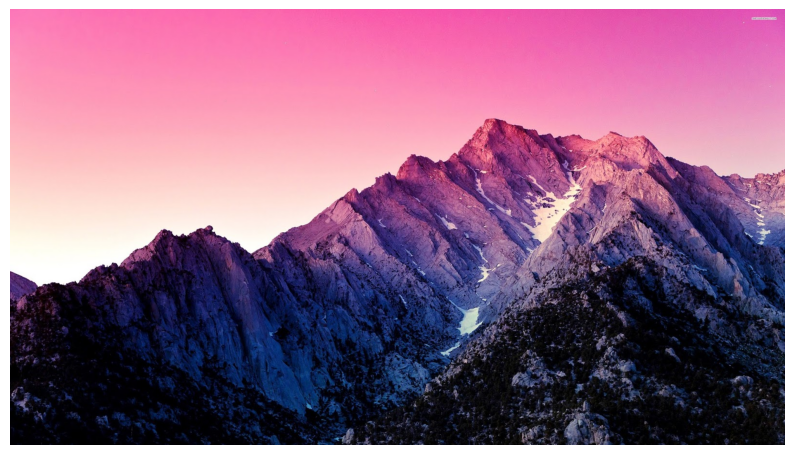

In [15]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./image_signal_processing/input.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [16]:
!nvcc ./image_signal_processing/gaussian_blur_image.cu -o ./image_signal_processing/gaussian_blur_image `pkg-config --cflags --libs opencv4` -diag-suppress 611
!./image_signal_processing/gaussian_blur_image

GPU Time: 0.6420 ms
CPU Time: 827.7238 ms
Speedup: 1289.1930x

Validation Results:
Mean absolute difference per channel (GPU vs OpenCV):
B: 0.5053 G: 0.5032 R: 0.5039
Mean absolute difference per channel (CPU vs OpenCV):
B: 0.5052 G: 0.5032 R: 0.5040


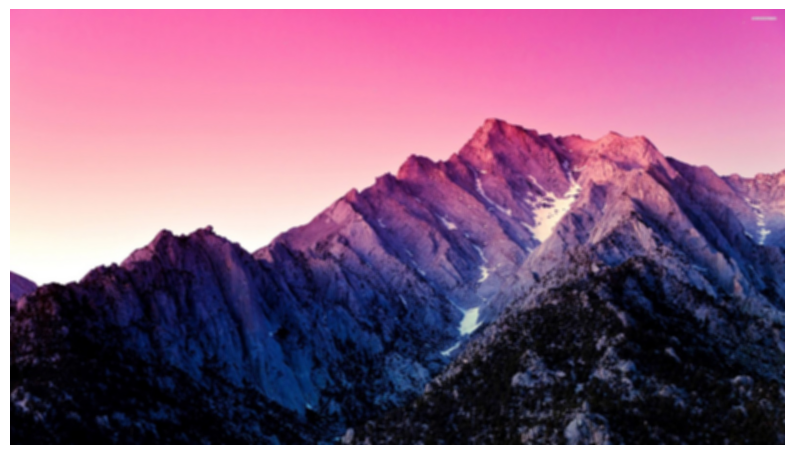

In [17]:
img = cv2.imread('./image_signal_processing/result_gpu.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [18]:
!make SRC=./image_signal_processing/gaussian_blur_image.cu clean

rm -f ./image_signal_processing/gaussian_blur_image *.o *.ptx


### **b. Fast Fourier Transform (FFT) on a signal**

`sudo apt-get install libsndfile1-dev`

In [19]:
!nvcc -o ./image_signal_processing/fft_mp3 ./image_signal_processing/fft_mp3.cu -lcufft -lsndfile
!./image_signal_processing/fft_mp3

Manual CPU vs cuFFT: Mismatch at index 4084
Result1: (-0.00183773,-0.029871)
Result2: (-0.00157261,-0.0295839)
Relative difference: 0.0130567
MISMATCH
Manual GPU vs cuFFT: MATCH
CPU Time: 5.8255 ms
GPU Time: 2.87293 ms
Speedup: 2.02772x


In [20]:
!python3 ./image_signal_processing/visualize_frequency_domain.py

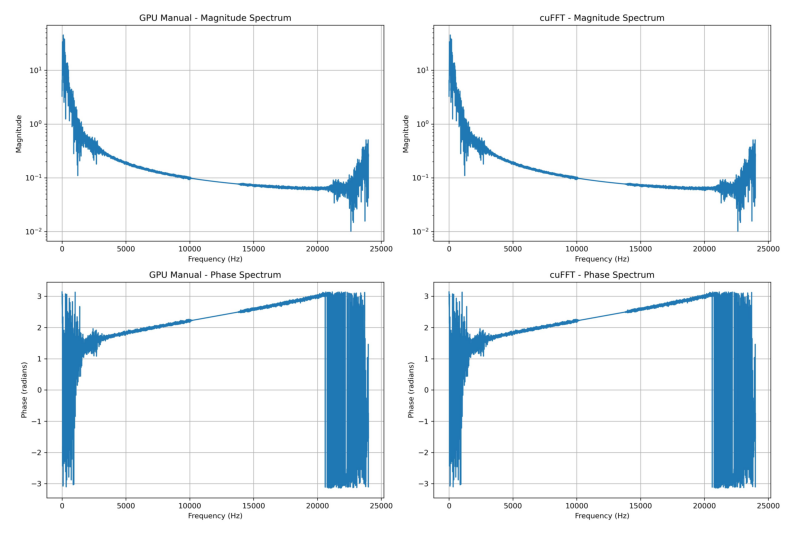

In [21]:
img = cv2.imread('./image_signal_processing/fft_comparison.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [22]:
!make SRC=./image_signal_processing/fft_mp3.cu clean

rm -f ./image_signal_processing/fft_mp3 *.o *.ptx


## **7. Histogram Equaliztion**

## **8. Statistical Simulation**

### **a. Monte Carlo Simulation**

## **9. Physics Simulation**

### **a. N-Body Simulation**

### **b. Navier-Stokes Fluid Simulation**

### **c. Heat Diffusion**

## **10. Graph Algorithms**

### **a. Breadth-First Search (BFS)**